In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
df = pd.read_csv("./Datasets-Question1/dataset5/Train5.csv", header=None)
tr_labels = df[2].add(0.1).astype(np.int).to_numpy()
tr_data = df[[0,1]].to_numpy()
print(tr_labels.shape)
print(tr_data.shape)


(960,)
(960, 2)


## Data Visualization

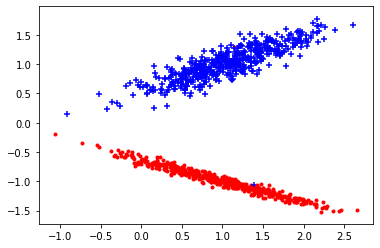

In [73]:
# configuration
color = ['red' , 'blue']
marker = ['.', '+']

ax = plt.axes()

for x , y in zip(tr_data, tr_labels):
    ax.scatter(x[0], x[1], c=color[y], marker=marker[y])

plt.show()

## Perceptron Learning Algorithm

In [74]:
# augmenting the training data
X = np.hstack((np.ones(tr_data.shape[0]).reshape(-1,1), tr_data))
Y = tr_labels*2-1

# print(X)

# initializing the weights
W = np.array([1,1,1], dtype=np.float)

# learning
converged = False
maxiter = 100000
k = 0
while k < maxiter and not converged:
    if k % 100 == 0:
        print("Weights at {}-th update is {}".format(k, W))
    Z = np.multiply(np.dot(X, W), Y)
    converged = True
    for j in np.argwhere(Z <= 0).reshape(-1):
        W = W + Y[j]*X[j]
        k += 1
        converged = False

print("Weights at convergence is {}".format(W))

Weights at 0-th update is [1. 1. 1.]
Weights at 1200-th update is [ 89.         183.42369098 665.19407303]
Weights at 1500-th update is [141.         200.83035679 436.83771612]
Weights at 2500-th update is [-17.         -31.96953217  97.08412998]
Weights at 3700-th update is [ 13.          71.08199294 801.94630587]
Weights at 4100-th update is [127.         192.27330239 416.0035696 ]
Weights at 4300-th update is [123.         136.63417365 319.51844154]
Weights at 4400-th update is [119.         108.94324614 273.32430343]
Weights at 4500-th update is [111.          84.4307294  230.24833383]
Weights at 4800-th update is [ 55.          34.77221179 127.66210119]
Weights at 5000-th update is [25.         17.46986347 45.3631009 ]
Weights at 5300-th update is [ 57.          43.21633103 121.93174021]
Weights at 6600-th update is [-35.         -42.15984192 315.2172071 ]
Weights at 6900-th update is [15.          3.27200347 71.71051136]
Weights at 8200-th update is [153.         200.79958931 605

Weights at 84300-th update is [ 91.          68.16198368 186.51604188]
Weights at 84400-th update is [ 75.          53.95821925 148.49626744]
Weights at 84700-th update is [-17.         -32.92285875 101.06346586]
Weights at 86000-th update is [229.         172.80276738 463.5301808 ]
Weights at 86400-th update is [157.         117.62068467 318.48232473]
Weights at 86600-th update is [121.          91.36418039 245.47075437]
Weights at 87100-th update is [33.         22.31363252 64.14806651]
Weights at 88300-th update is [-21.          61.74878679 767.31615281]
Weights at 88800-th update is [113.         152.27537474 337.31368485]
Weights at 89500-th update is [  3.         -17.30161707  95.9362784 ]
Weights at 90600-th update is [263.         220.54142687 570.35888034]
Weights at 90900-th update is [223.         167.38340655 450.52483657]
Weights at 91300-th update is [151.         114.17765825 304.67994025]
Weights at 91500-th update is [115.          86.0453189  232.44222008]
Weights a

[-1.0602054796001297, 2.6515929850227518]
[-0.06103975622542148, -1.0824923243877704]


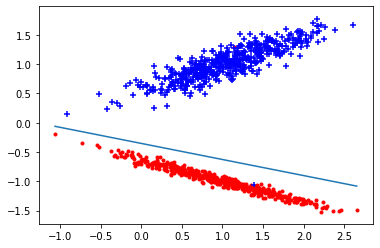

In [78]:
def get_y(x, W):
    return -1 * (W[0] + W[1]*x) / W[2]

# configuration
color = ['red' , 'blue']
marker = ['.', '+']

ax = plt.axes()

for x , y in zip(tr_data, tr_labels):
    ax.scatter(x[0], x[1], c=color[y], marker=marker[y])

    
# drawing line 
# get two points 

x_coord = [np.min(X[:,1]) , np.max(X[:,1])]
y_coord = [get_y(x,W) for x in x_coord]

print(x_coord)
print(y_coord)

ax.plot(x_coord, y_coord)

plt.show()